# numpy cheatsheet - array creation routines
本文档包含绝大多数numpy创建数组的函数，但不包含ufunc，ufunc文档在另外的notebook中

## 总体参数说明
- a/array_like: 可以使用__array__函数返回成数组任何对象，包括```list, tuple, list[list...], tuple[tuple...], list[tuple...], tuple[list...]```
- v: 向量参数
- shape: numpy数组的各维度长度的tuple
- out: 代入的numpy数组作为输出
- dtype: numpy数组类型
- order: C顺序或Fortran顺序
- subok: True返回ndarray的子类，False返回ndarray


In [1]:
# 导入numpy和matplotlib内联到jupyter中
import numpy as np
%matplotlib inline

## 数组创建函数
### 壹和零

In [2]:
# empty(shape [, dtype, order]) 
# empty_like(a [, dtype, order, subok])
# 创建一个数组，不初始化数组元素的数据
arr = np.empty((3, 5), dtype=np.int8)
print(arr)
b = np.empty_like(arr, dtype=np.float)
print(b)

[[-120  -21  -13  103   -6]
 [ 127    0    0  -16   25]
 [  91    3    0    0    0]]
[[  6.95216878e-310   6.95216878e-310   0.00000000e+000   0.00000000e+000
    0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    6.32404027e-322]]


In [3]:
# eye(N [, M, k, dtype, order])
# N - 矩阵的行数
# M - 矩阵的列数，默认N
# k - 对角线位置，默认0，正数对角线偏上，负数对角线偏下
# 创建一个对角矩阵
arr = np.eye(5)
print(arr)
arr = np.eye(5, 4, -1, dtype=np.int)
print(arr)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [4]:
# identity(N [, dtype])
# N - 矩阵行和列的长度
# 创建一个单位矩阵
v = np.identity(5)
print(v)
v = np.identity(5, dtype=np.int)
print(v)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [5]:
# ones(shape [, dtype, order])
# ones_like(a [, dtype, order, subok])
# 创建一个全部为1的数组
arr = np.ones((3, 5))
print(arr)
arr = np.ones_like(arr, dtype=np.int)
print(arr)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [6]:
# zeros(shape [, dtype, order])
# zeros_like(a [, dtype, order, subok])
# 创建一个全部为0的数组
arr = np.zeros((3, 5))
print(arr)
arr = np.zeros_like(arr, dtype=np.int)
print(arr)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [7]:
# full(shape, value [, dtype, order])
# full_like(a, value [, dtype, order, subok])
# value - 填充数据使用的元素值
# 创建一个全部元素都为value的数据
arr = np.full((3, 5), 100.)
print(arr)
arr = np.full_like(arr, 99., dtype=np.int)
print(arr)

[[ 100.  100.  100.  100.  100.]
 [ 100.  100.  100.  100.  100.]
 [ 100.  100.  100.  100.  100.]]
[[99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


### 从已存在的数据中导入

In [8]:
# array(object [, dtype, copy, order, subok, ndmin])
# object - 任何具有__array__函数并返回成一个数组的Python对象
# copy - 默认True，函数返回该数组的一份拷贝，False，函数返回的仅为数组的一个视图
# ndmin - 返回的数组至少需要的维度值，缺少的维度将使用1填充
# 从已有的可生成数组的对象中创建一个numpy数组
python_list = [[1, 2], [3, 4]]
arr = np.array(python_list)
print(arr)
arr[0, 0] = 100
print(python_list)
print(arr)
# 注意ndmin会将缺少的维度加到最前面
arr = np.array(python_list, ndmin=3)
print(arr.shape)
# 如果需要后面加入缺少的维度，使用reshape
arr = np.array(python_list)
b = arr.reshape(arr.shape + (1,))
print(b.shape)

[[1 2]
 [3 4]]
[[1, 2], [3, 4]]
[[100   2]
 [  3   4]]
(1, 2, 2)
(2, 2, 1)


In [9]:
# asarray(a [, dtype, order])
# asanyarray(a [, dtype, order])
# ascontiguousarray(a [, dtype])
# asfortranarray(a, [, dtype])
# 将一个array_like转换成numpy数组，asarray转换为array对象，asanyarray转换为array对象或子对象（如果a本身就是numpy array的子对象）
# ascontiguousarray按照C语言顺序转换为numpy数组，asfortranarray按照Fortran语言顺序转换为numpy数组
arr = np.asarray(python_list)
print(arr)
mt = np.matrix(python_list)
arr = np.asarray(mt)
print(type(arr))
arr = np.asanyarray(mt)
print(type(arr))
arr = np.ascontiguousarray(mt)
print(arr)
print(type(arr))

[[1 2]
 [3 4]]
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
[[1 2]
 [3 4]]
<class 'numpy.ndarray'>


In [10]:
# asmatrix(a [, dtype])
# 将一个array_like转换为numpy matrix对象
mt = np.asmatrix(python_list)
print(mt)
print(type(mt))

[[1 2]
 [3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'>


In [11]:
# copy(a [, order])
# 返回一个array_like的拷贝
arr = np.copy(python_list)
print(arr)

[[1 2]
 [3 4]]


In [12]:
# frombuffer(buffer [, dtype, order, count, offset])
# buffer - 一个带有buffer接口的对象
# count - buffer中用来转换为numpy数组的缓冲长度
# offset - buffer的偏移量，即开始转换的位置
numbers = b'0123456789'
arr = np.frombuffer(numbers, dtype=np.int8, count=5, offset=3)
print(arr)
binstr = b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\x09'
arr = np.frombuffer(binstr, dtype=np.int8, count=5, offset=3)
print(arr)
binary = 0x10203040506070809.to_bytes(10, 'big')
arr = np.frombuffer(binary, dtype=np.int8, count=5, offset=3)
print(arr)

[51 52 53 54 55]
[3 4 5 6 7]
[3 4 5 6 7]


In [13]:
# fromfile(file [, dtype, count, sep])
# file - 转换numpy数组的文件
# count - 文件中读取用于转换的数据个数，默认-1代表全部
# sep - 文本文件中的数据分隔符号，如果为''，文件将以二进制方式读取
# 将文件中的数据转换为一个numpy数组
arr = np.array(python_list)
import os
filename = '/tmp/tmpnumpyfile'
arr.tofile(filename)
print(np.fromfile(filename, dtype=np.int))
os.remove(filename)

[1 2 3 4]


In [14]:
# fromfunction(func, shape, [, dtype, **kwargs])
# func - 用于创建numpy数组的函数，至少包含两个参数：行号i与列号j
# kwargs - 额外传递给func的参数
# 使用函数创建一个numpy数组
arr = np.fromfunction(lambda i, j: 10*i+j, (5, 5), dtype=np.int)
print(arr)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [15]:
# fromiter(iter, dtype [, count])
# iter - 一个python iterable迭代器
# count - 从迭代器中取出的数据个数
# 将一个迭代器的数据转换为一个一维numpy数组
def fibonaci():
    start, step = 0, 1
    yield start
    yield step
    while True:
        yield start + step
        start, step = step, start + step
arr = np.fromiter(fibonaci(), dtype=np.int, count=10)
print(arr)

[ 0  1  1  2  3  5  8 13 21 34]


In [16]:
# fromstring(string [, dtype, count, sep])
# string - 用来转换numpy数组的字符串
# count - 转换的数据个数，默认-1表示全部
# sep - 字符串数据的分隔符号，默认''
# 将一个字符串数据转换为一维numpy数组
arr = np.fromstring('1 2 3 4', dtype=np.int, sep=' ')
print(arr)
arr = np.fromstring('''1, 2
3, 4,  5''', sep=' ', count=4)
print(arr)

[1 2 3 4]
[  1.00000000e+000   9.88131292e-324   1.48219694e-323   1.97626258e-323]


In [17]:
# loadtxt(file [, dtype, comments, delimiter, converters, skiprows, usecols, unpack, ndmin, encoding])
# file - 读取数据的文本文件
# comments - 读取时忽略的行注释符号，默认'#'
# delimiter - 读取文本文件行的分隔符号，默认空白字符（任意数量）
# converters - 用于转换每一列数据的函数dict，如{0: lambda x: float(x or 0)}
# skiprows - 文件起始跳过读取的行数，默认0
# usecols - 需要读取的列tuple，默认None代表全部
# ndmin - 转换后numpy数组的最少维度数量，可选值0,1,2
# encoding - 文本文件的编码，默认bytes
# 读取文本文件并将其创建成一个numpy数组
from io import StringIO
strfile = StringIO('1 2\n3 4')
arr = np.loadtxt(strfile, dtype=np.int, delimiter=' ')
print(arr)
strfile = StringIO('''name,gender,age,height,weight,email
Jack,M,15,171,85.5,jack@msn.com
Mary,F,21,166,51.2,mary@yahoo.com''')
arr = np.loadtxt(strfile, dtype={'names':('name','gender','age','weight'),
                                'formats':('S10','S1','i1','f4')},
                skiprows=1, usecols=(0,1,2,4), delimiter=',')
print(arr)

[[1 2]
 [3 4]]
[(b'Jack', b'M', 15,  85.5       ) (b'Mary', b'F', 21,  51.20000076)]


In [18]:
# genfromtxt(fname [, dtype, comments, delimiter, converters, skip_header, skip_footer, missing_values, 
#            filling_values, usecols, names, excludelist, deletechars, replace_space, autostrip,
#            case_sensitive, default_fmt, unpack, usemask, loose, invalid_raise, max_rows, encoding])
# 所有与loadtxt函数同名的参数代表一致的意义
# fname - 文件、文件名、pathlib.Path对象(URI)、字符串list、生成器generator都可以被接受
# skip_header - 文件头忽略的行数，默认0
# skip_footer - 文件结尾忽略的行数，默认0
# missing_values - 一个字符串的set，包含所有表示缺失值的字符串，默认None
# filling_values - 一个set，包含所有缺失值所对应的默认值，默认None
# names - True: 使用文件头跳过之后的首行作为numpy数组的的列名称；None（默认值）：使用dtype里面设置的名称，或默认名称；
#         字符串：使用逗号分隔的字符串作为numpy数组的列名称；字符串序列：使用序列中的字符串作为numpy数组的列名称
# excludelist - 需要去除的名称字符串序列，默认None
# deletechars - 名称中需要删除的字符串，默认None
# replace_space - 名称中如果含有空白，使用该参数替代，默认'_'
# autostrip - 是否自动去除前后导空白符号，默认False
# case_sensitive - True: 名称大小写敏感；False或'upper': 名称转为大写；'lower': 名称转为小写
# default_fmt: 默认名称的格式，默认'f%i'，即'f1','f2'...
# usemask: 是否返回一个masked array，默认False
# loose: True(默认值): 当发现错误的数据时，不要抛出错误（异常）
# invalid_raise: True（默认值）: 当某行列数不一致时，抛出错误（异常）
# max_rows: 读取文件进行转换的最大行数，默认值None代表全部
from io import BytesIO
strfile = BytesIO(b'''name,gender,age,height,weight,email
Jack,M,15,171,85.5,jack@msn.com
Mary,F,21,166,51.2,mary@yahoo.com''')
arr = np.genfromtxt(strfile, dtype=('S10','S1','i1','i2','f4','S50'), 
                    names=True, 
                    delimiter=',', case_sensitive=False)
arr

array([(b'Jack', b'M', 15, 171,  85.5       , b'jack@msn.com'),
       (b'Mary', b'F', 21, 166,  51.20000076, b'mary@yahoo.com')],
      dtype=[('NAME', 'S10'), ('GENDER', 'S1'), ('AGE', 'i1'), ('HEIGHT', '<i2'), ('WEIGHT', '<f4'), ('EMAIL', 'S50')])

### 使用范围创建数组

In [19]:
# arange([start, ] stop [, step, dtype])
# start - 范围开始值，默认0
# stop - 范围结束值，不包含
# step - 步长值，默认1
# 使用范围创建一个numpy数组
arr = np.arange(10)
print(arr)
arr = np.arange(np.datetime64('2017-01-01'), np.datetime64('2017-01-31'), 7, dtype='datetime64')
print(arr)

[0 1 2 3 4 5 6 7 8 9]
['2017-01-01' '2017-01-08' '2017-01-15' '2017-01-22' '2017-01-29']


In [20]:
# linspace(start, stop [, num, endpoint, retstep, dtype])
# start - 范围开始值
# stop - 范围结束值
# num - 分割的点数量，默认50
# endpoint - True（默认值）: 包含结束值
# retstep - 是否返回步长值，如果True，第二个返回值为步长值，默认False
# 使用范围平均分割创建numpy数组
arr = np.linspace(-10, 10, num=11)
print(arr)
arr, step = np.linspace(1, 31, num=10, endpoint=False, retstep=True, dtype='f8')
print(arr)
print(step)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[  1.   4.   7.  10.  13.  16.  19.  22.  25.  28.]
3.0


In [21]:
# logspace(start, stop [, num, endpoint, base, dtype])
# 同名参数与linspace意义一致
# base - log空间的底
# 使用log空间分割创建numpy数组
arr = np.logspace(-10, 10, num=11)
print(arr)
arr = np.logspace(1, 31, num=10, endpoint=False, base=np.e, dtype='f8')
print(arr)

[  1.00000000e-10   1.00000000e-08   1.00000000e-06   1.00000000e-04
   1.00000000e-02   1.00000000e+00   1.00000000e+02   1.00000000e+04
   1.00000000e+06   1.00000000e+08   1.00000000e+10]
[  2.71828183e+00   5.45981500e+01   1.09663316e+03   2.20264658e+04
   4.42413392e+05   8.88611052e+06   1.78482301e+08   3.58491285e+09
   7.20048993e+10   1.44625706e+12]


In [22]:
# geomspace(start, stop [, num, endpoint, dtype])
# start - 指定范围起始值，但与logspace不同，该值无需使用base ** start计算得到
# end - 指定范围结束值，但与logspace不同，该值无需使用base ** stop计算得到
arr = np.geomspace(1, 1000, num=4)
print(arr)
arr = np.geomspace(-256, -1, num=8, endpoint=False, dtype='f4')
print(arr)

[    1.    10.   100.  1000.]
[-256. -128.  -64.  -32.  -16.   -8.   -4.   -2.]


[[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]]
[[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]


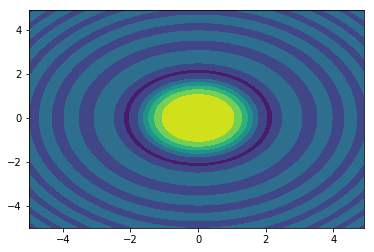

In [23]:
# meshgrid(*xn, **kwargs)
# 使用xn向量族生成n维空间的网格。
x = np.linspace(-1, 1, num=11) #共11个值
y = np.linspace(-2, 2, num=5) #共5个值
xx, yy = np.meshgrid(x, y) # xx和yy都是一个5*11的矩阵，其中x向量填充xx的行，y向量填充yy的列
print(xx)
print(yy)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2)/(xx**2+yy**2)
import matplotlib.pyplot as plt
plt.contourf(x, y, z)
plt.show()

### 创建矩阵

In [24]:
# diag(v [, k])
# k - 对角线处于矩阵的位置，0（默认值）：主对角线位置；正数：主对角线上方；负数：主对角线下方
# 使用向量创建一个对角矩阵
arr = np.diag([1, 2, 3, 4])
print(arr)
arr = np.diag([1, 2, 3, 4], k=-1)
print(arr)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [25]:
# diagflat(a [, k])
# 将a扁平化后变成向量，然后作为对角线向量创建一个对角矩阵
arr = np.diagflat([[1, 2], [3, 4]])
print(arr)
arr = np.diagflat([[1, 2], [3, 4]], k=-1)
print(arr)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [26]:
# tri(N [, M, k, dtype])
# N - 矩阵的行数
# M - 矩阵的列数
# 创建一个对角线位置及以下位置都是1，其他元素都是0的三角矩阵
arr = np.tri(5, k=-1)
print(arr)
arr = np.tri(5, 3, k=1, dtype='i8')
print(arr)

[[ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  1.  0.]]
[[1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [27]:
# tril(a [, k])
# 创建a的拷贝，将a对角线位置k以上位置的元素全部变为0
# triu(a [, k])
# 创建a的拷贝，将a对角线位置k以下位置的元素全部变为0
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.tril(arr))
print(np.tril(arr, -1))
print(np.triu(arr))
print(np.triu(arr, -1))

[[1 0 0]
 [4 5 0]
 [7 8 9]]
[[0 0 0]
 [4 0 0]
 [7 8 0]]
[[1 2 3]
 [0 5 6]
 [0 0 9]]
[[1 2 3]
 [4 5 6]
 [0 8 9]]


In [28]:
# vander(v [, N, increasing])
# N - 生成的范德蒙矩阵的列数，默认值为None，表示矩阵是一个行列都为len(v)的方阵
# increasing - False（默认值）: 生成的范德蒙矩阵列从左到右是降序的；True: 升序
v = np.array([1, 3, 7, 9])
arr = np.vander(v)
print(arr)
arr = np.vander(v, 3)
print(arr)
arr = np.vander(v, increasing=True)
print(arr)
# 范德蒙矩阵的行列式是生成向量各元素之间差的连乘乘积
print(np.linalg.det(arr))
print(np.multiply.reduce([v[i]-v[j] for i in range(len(v)) for j in range(i+1, len(v))]))

[[  1   1   1   1]
 [ 27   9   3   1]
 [343  49   7   1]
 [729  81   9   1]]
[[ 1  1  1]
 [ 9  3  1]
 [49  7  1]
 [81  9  1]]
[[  1   1   1   1]
 [  1   3   9  27]
 [  1   7  49 343]
 [  1   9  81 729]]
4608.0
4608
